In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
  
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [2]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"

df = pd.read_csv('sentiment.csv',encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

#df = newdf.dropna()

df.sample(5)

,target,ids,date,flag,user,text
907741,4,1695921288,Mon May 04 07:14:19 PDT 2009,NO_QUERY,dequese,@Meaty216 They are people too
826073,4,1556607918,Sat Apr 18 23:32:19 PDT 2009,NO_QUERY,MoniqueMontez,Fuddruckers in Lakewood by south street. Only ...
1270888,4,2000473346,Mon Jun 01 22:11:39 PDT 2009,NO_QUERY,kayy_b,boutt ta takee myy butt to sleeep ! gett ta se...
528890,0,2195263985,Tue Jun 16 10:54:00 PDT 2009,NO_QUERY,x_mychemical_x,"i soo failed finals? maybe, but it seemed pre..."
828712,4,1557061500,Sun Apr 19 01:47:58 PDT 2009,NO_QUERY,Tanya_Ford,"@MariahCarey Yeah, I want to play NTT..."


In [3]:
df.head()
#df.columns


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [5]:
print('length of data is', len(df))

length of data is 1600000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [8]:
np.sum(df.isnull().any(axis=1))

0

In [9]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [10]:
df['target'].unique()

array([0, 4], dtype=int64)

In [11]:
df['target'].nunique()


2

In [12]:
# import seaborn as sns
# sns.countplot(x='target', data=df)

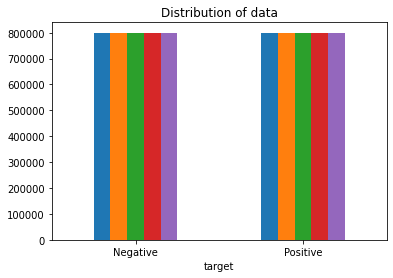

In [13]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

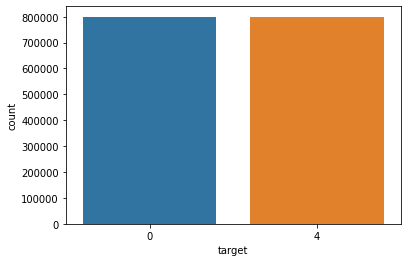

In [14]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [15]:
data=df[['text','target']]


In [16]:
data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [17]:
data['target'] = data['target'].replace(4,1)

c:\Users\simra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
data['target']

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64

In [19]:
data['target'].unique()


array([0, 1], dtype=int64)

In [20]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [21]:
data_pos = data_pos.iloc[:int(2000)]
data_neg = data_neg.iloc[:int(2000)]

In [22]:
dataset = pd.concat([data_pos, data_neg])

In [23]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

1995                            @roxy_yeah yep a loser.  
1996    and finito! all bathroom contractors been thru...
1997    @caitlinaudrey awww!  that sucks! are you goin...
1998    sorry, sf. rescheduling my sf trip for this co...
1999    2morw  i get my blasted wisdom teeth pulled! n...
Name: text, dtype: object

In [24]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [25]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].tail(20)

1980     fightin name callin, still run 2 sister! nite...
1981                                  sick today lot work
1982    trying find tech job. can't find entry level j...
1983                                     4 insomnia bitch
1984                         threw over bathroom. not fun
1985                                             off work
1986                really hungry sad throw breakfast bin
1987     oh darn...it's mandy creed isnt @jordar @mikerra
1988     dont understand. didnt mean break anyones heart.
1989    obama visiting istanbul today, therefore main ...
1990            lovely day, blazing sunshine.... bad work
1991    omg girl woke up, reason doesnt matter &amp; c...
1992    @viennateng didn't tweet germany, heard concer...
1993                late night re-runs http://ff.im/1y02l
1994                           getting home...its snowing
1995                                @roxy_yeah yep loser.
1996    finito! bathroom contractors thru house. quote...
1997        @c

In [26]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

1995                                   roxyyeah yep loser
1996    finito bathroom contractors thru house quotes ...
1997            caitlinaudrey awww sucks going sydney one
1998    sorry sf rescheduling sf trip coming weekend m...
1999    2morw get blasted wisdom teeth pulled need sle...
Name: text, dtype: object

In [27]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

1995                                   roxyyeah yep loser
1996    finito bathroom contractors thru house quotes ...
1997            caitlinaudrey awww sucks going sydney one
1998    sorry sf rescheduling sf trip coming weekend m...
1999    2morw get blasted wisdom teeth pulled need sle...
Name: text, dtype: object

In [28]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

1995                                   roxyyeah yep loser
1996    finito bathroom contractors thru house quotes ...
1997            caitlinaudrey awww sucks going sydney one
1998    sorry sf rescheduling sf trip coming weekend m...
1999    2morw get blasted wisdom teeth pulled need sle...
Name: text, dtype: object

In [29]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

1995                                   roxyyeah yep loser
1996    finito bathroom contractors thru house quotes ...
1997            caitlinaudrey awww sucks going sydney one
1998    sorry sf rescheduling sf trip coming weekend m...
1999    morw get blasted wisdom teeth pulled need slee...
Name: text, dtype: object

In [30]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [31]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [32]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [33]:
X=data.text
y=data.target

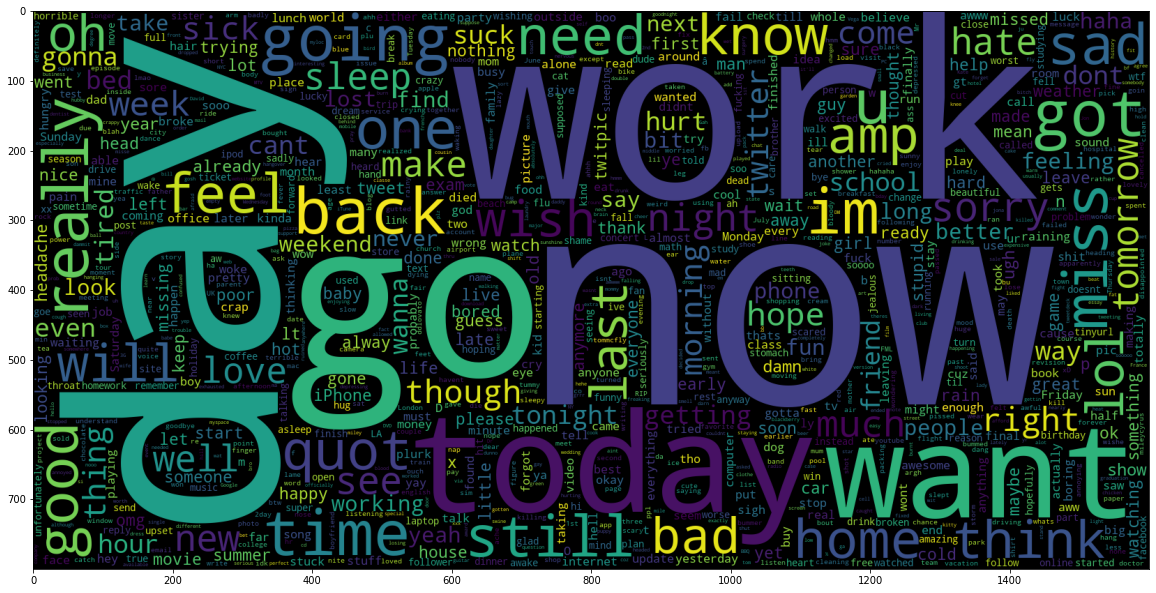

In [34]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

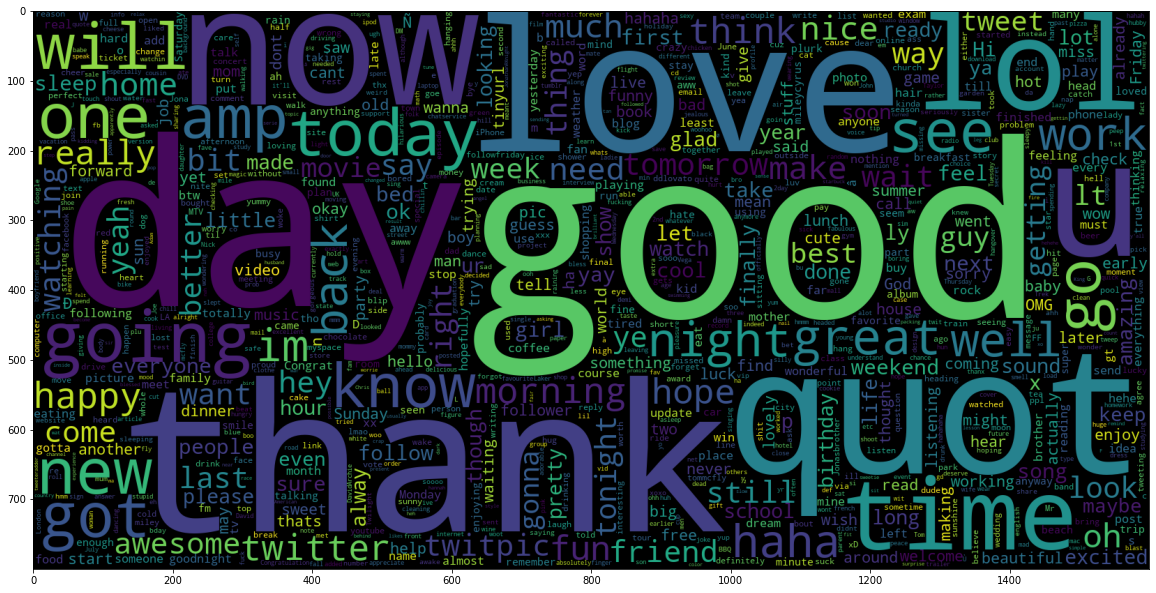

In [35]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)


In [36]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [37]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [38]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [39]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



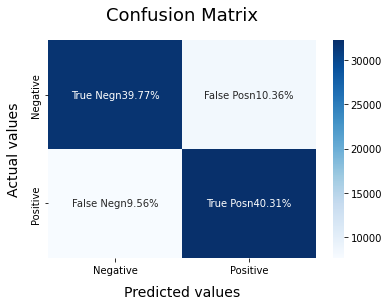

In [37]:
# BNBmodel = BernoulliNB()
# BNBmodel.fit(X_train, y_train)
# model_Evaluate(BNBmodel)
# y_pred1 = BNBmodel.predict(X_test)


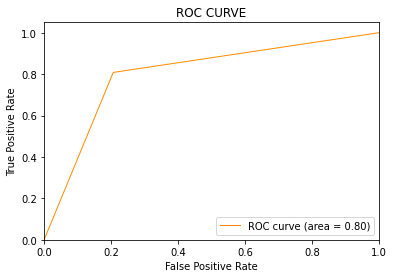

In [38]:
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC CURVE')
# plt.legend(loc="lower right")
# plt.show()

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



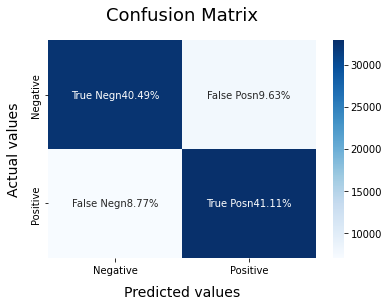

In [39]:
# SVCmodel = LinearSVC()
# SVCmodel.fit(X_train, y_train)
# model_Evaluate(SVCmodel)
# y_pred2 = SVCmodel.predict(X_test)

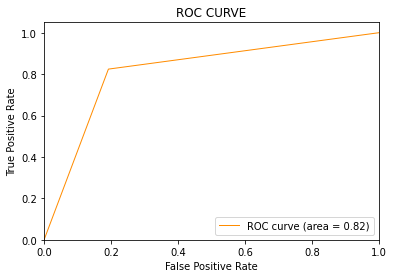

In [40]:
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC CURVE')
# plt.legend(loc="lower right")
# plt.show()

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



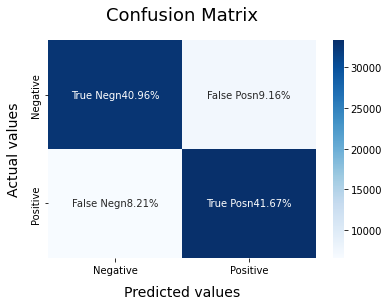

In [40]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

In [41]:
import pickle
# json_file = LRmodel.to_json()
# with open("C:/Users/simra/Downloads/fake_jsonsent.json", "w") as file:
#    file.write(json_file)
# # serialize weights to HDF5

pickle.dump(LRmodel, open("C:/Users/simra/Downloads/fake_jsonsent.sav", 'wb'))
loaded_model = pickle.load(open("C:/Users/simra/Downloads/fake_jsonsent.sav", 'rb'))
result = loaded_model.score(X_test, y_pred3)
print(result)

1.0


In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
token = Tokenizer()

In [43]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [48]:
MAX_SEQUENCE_LENGTH = 500000
test_text = "talking to jessica about her one true love. she thinks this could be the real deal.  lol also i am thinking what i should do about my prob"
test_sequence = token.texts_to_sequences([test_text])
test_sequence = pad_sequences(test_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
#test_text = vectoriser.fit(test_text)

In [49]:
pred = LRmodel.predict(test_sequence)
print(pred)

[1]


In [46]:
print(pred)

[1]


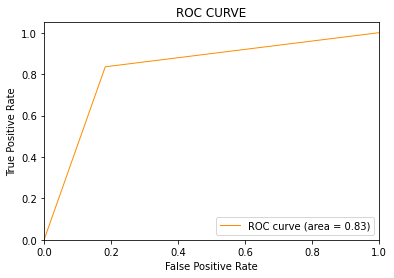

In [42]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

LR>SVM>BNB